In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import re
import nltk


In [ ]:
#download stopwrds corpus from nltk library
nltk.download('stopwords')
#download tokenizer model
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
trainning = pd.read_csv('/content/twitter_training.csv',header = None)
trainning.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
validation = pd.read_csv('/content/twitter_validation.csv',header = None)
validation

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#chnging columns name
trainning.columns=['ID','INFO','TYPE','TEXT']
validation.columns=['ID','INFO','TYPE','TEXT']
validation.tail()

,ID,INFO,TYPE,TEXT
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
t_df = trainning
v_df = validation

In [ ]:
#chnging text to lowercase
t_df['lower']=t_df.TEXT.str.lower()
#lower colomn text converted into string
t_df['lower']=[str(data) for data in t_df.lower]
#remove non-aplhanumeic chrc
t_df['lower']=t_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+','    ',x))
t_df.head()

,ID,INFO,TYPE,TEXT,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders a...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i ...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and...


In [ ]:
#chnging text to lowercase
v_df['lower']=v_df.TEXT.str.lower()
#lower colomn text converted into string
v_df['lower']=[str(data) for data in v_df.lower]
#remove non-aplhanumeic chrc
v_df['lower']=v_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+','    ',x))
v_df.head()

,ID,INFO,TYPE,TEXT,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for ...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping a...


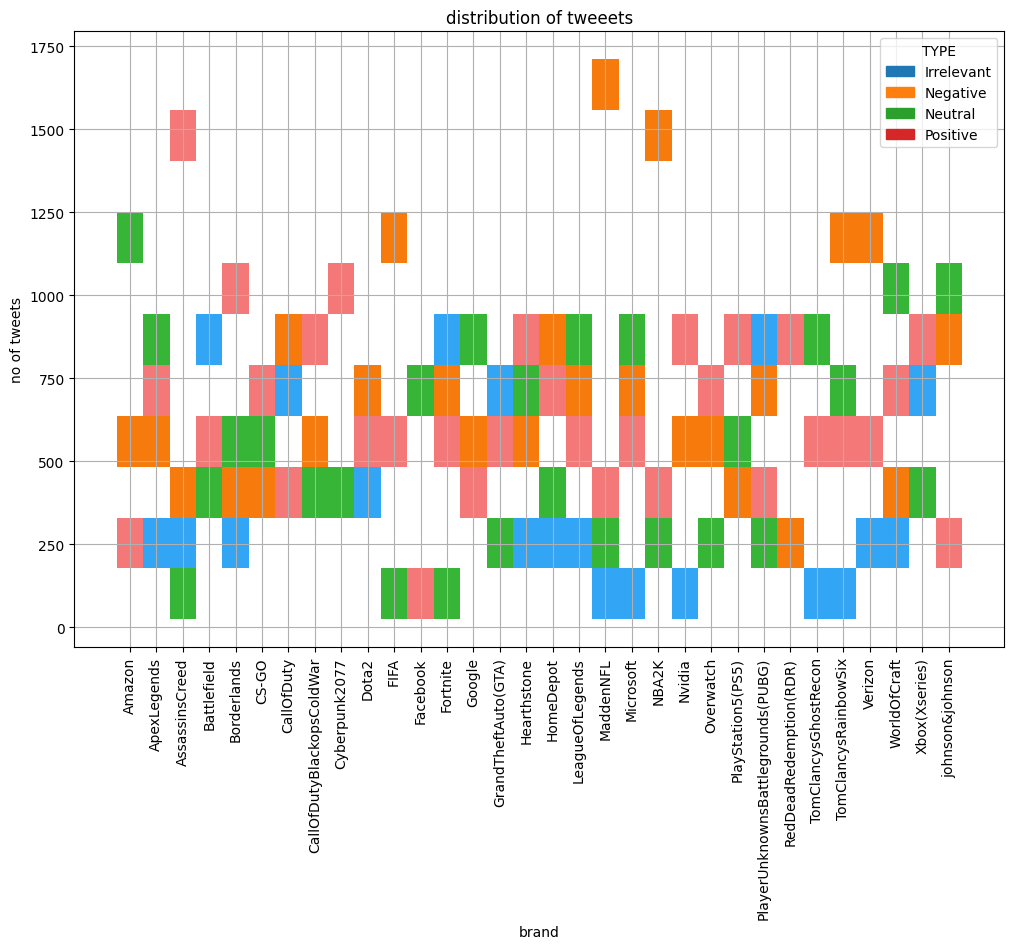

In [ ]:
#ploting graph
Info=trainning.groupby(by=["INFO","TYPE"]).count().reset_index()
plt.figure(figsize=(12,8))
sns.histplot(data=Info, x='INFO', y='ID', hue='TYPE')
plt.title('distribution of tweeets')
plt.xticks(rotation=90)
plt.xlabel('brand')
plt.ylabel('no of tweets')
plt.grid()



In [ ]:
#tokenize the text
from nltk import word_tokenize
tokenize_text = [word_tokenize(str(word)) for word in v_df.lower]
tokenize_text

[['i',
  'mentioned',
  'on',
  'facebook',
  'that',
  'i',
  'was',
  'struggling',
  'for',
  'motivation',
  'to',
  'go',
  'for',
  'a',
  'run',
  'the',
  'other',
  'day',
  'which',
  'has',
  'been',
  'translated',
  'by',
  'tom',
  's',
  'great',
  'auntie',
  'as',
  'hayley',
  'can',
  't',
  'get',
  'out',
  'of',
  'bed',
  'and',
  'told',
  'to',
  'his',
  'grandma',
  'who',
  'now',
  'thinks',
  'i',
  'm',
  'a',
  'lazy',
  'terrible',
  'person'],
 ['bbc',
  'news',
  'amazon',
  'boss',
  'jeff',
  'bezos',
  'rejects',
  'claims',
  'company',
  'acted',
  'like',
  'a',
  'drug',
  'dealer',
  'bbc',
  'co',
  'uk',
  'news',
  'av',
  'busine'],
 ['microsoft',
  'why',
  'do',
  'i',
  'pay',
  'for',
  'word',
  'when',
  'it',
  'functions',
  'so',
  'poorly',
  'on',
  'my',
  'samsungus',
  'chromebook'],
 ['csgo',
  'matchmaking',
  'is',
  'so',
  'full',
  'of',
  'closet',
  'hacking',
  'it',
  's',
  'a',
  'truly',
  'awful',
  'game'],
 ['

In [ ]:
stpwrds_nltk = nltk.corpus.stopwords
stop_words = stpwrds_nltk.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
bow_count=CountVectorizer(tokenizer=word_tokenize,stop_words=stop_words,ngram_range=(2,2))
bow_count

CountVectorizer(ngram_range=(2, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7e2384fc4ee0>)

In [ ]:
#traning and testing
Train,Test=train_test_split(t_df,test_size=0.2,random_state=32)
x_train_bow = bow_count.fit_transform(Train.lower)
x_test_bow = bow_count.fit_transform(Test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [ ]:
from tkinter.constants import Y
Y_train_bow=Train['TYPE']
Y_test_bow=Test['TYPE']
Y_train_bow

63490      Negative
8061       Negative
20333      Positive
17696      Positive
30125      Negative
            ...    
53758    Irrelevant
24828      Negative
20414       Neutral
60284    Irrelevant
10967    Irrelevant
Name: TYPE, Length: 59745, dtype: object

In [ ]:
#Regression model
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(C=1,solver='liblinear',max_iter=200)
logi.fit(x_train_bow,Y_train_bow)
testpred=logi.predict(x_test_bow)
print("Accurcy: ",accuracy_score(Y_test_bow,testpred))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ValueError: X has 101995 features, but LogisticRegression is expecting 245785 features as input.

In [ ]:
X_v_bow = bow_count.transform(v_df.lower)
y_v_bow = v_df['TYPE']
y_v_bow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: TYPE, Length: 1000, dtype: object

In [ ]:
val=logi.predict(X_v_bow)
accuracy_score(y_v_bow,val)

ValueError: X has 101995 features, but LogisticRegression is expecting 245785 features as input.